### KNN: Horses & Dogs

Lets start by creating a dataset that we can use to begin to understand how to create an algorithm for classification:

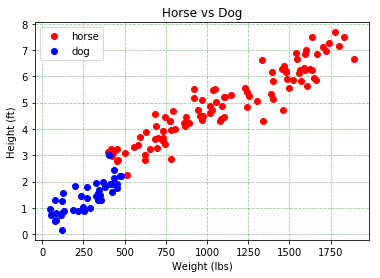

In [55]:
import numpy as np
import numpy.random
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

horse_weight = numpy.random.rand(100) * 1500.0 + 400.0      # lbs
horse_height = horse_weight/370 + numpy.random.normal(0, 0.5, horse_weight.shape) + 2  # ft

dog_weight = numpy.random.rand(40) * 500.0 + 10.0      # lbs
dog_height = dog_weight/300 + numpy.random.normal(0, 0.3, dog_weight.shape) + 0.5  # ft

plt.plot(horse_weight, horse_height, 'ro',label='horse')
plt.plot(dog_weight, dog_height, 'bo',label='dog')
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.grid(alpha=.4,c='g',ls='--')
plt.legend()
plt.show()


## Applying the algorithm
- Lets begin by looking at how the classification changes using a different number of points

You can change K to see the difference!

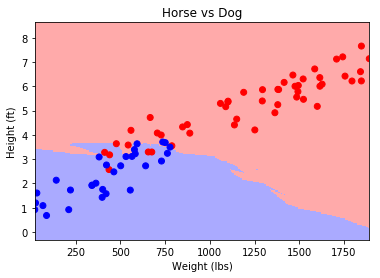

In [56]:
import numpy as np
import numpy.random
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


#Specify your parameters
k = 10
hx = 0.5  # step size in the mesh
hy = 0.05
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#Create the data
numpy.random.seed(12345)

horse_weight = numpy.random.rand(50) * 1500.0 + 400.0      # lbs
horse_height = horse_weight/370 + numpy.random.normal(0, 0.5, horse_weight.shape) + 2  # ft

dog_weight = numpy.random.rand(30) * 800.0 + 10.0      # lbs
dog_height = dog_weight/300 + numpy.random.normal(0, 0.5, dog_weight.shape) + 1  # ft

X = np.column_stack((np.concatenate((horse_weight, dog_weight)),
                     np.concatenate((horse_height, dog_height))))
y = np.concatenate((np.zeros(horse_weight.shape),
                    np.ones(dog_weight.shape)))

#Create the classifer
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.show()


# Writing your own KNN
Here, we are going to briefly explore how to write your own KNN algorithm!

First, we are going to import the nessecary libraries & then load the **Iris dataset**

In [92]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
iris = datasets.load_iris()

Now we are going to create a **pandas** dataframe, and add the target to it!

In [94]:
import pandas as pd
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target

In [95]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plotting
- Using this dataset, we can plot 2 of our columns against each other to see some of the clusters

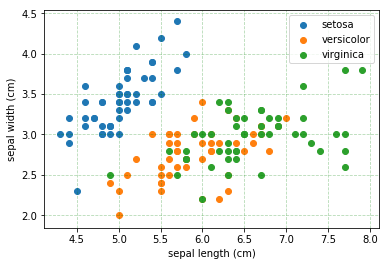

In [96]:
def plot():
    for val in set(df['target']):
        x = df.loc[df['target'] == val,'sepal length (cm)']
        y = df.loc[df['target'] == val,'sepal width (cm)']
        plt.scatter(x,y,label = iris.target_names[val])
    plt.legend()
    plt.grid(alpha = .3,ls='--',c='g')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)');
plot()

### New Point:
- We have a new point, and we want to find its **5 closest** neighbors!

new point: 

- sepal length (cm)    5.6
- sepal width (cm)     3.4
- petal length (cm)    4
- petal width (cm)     3

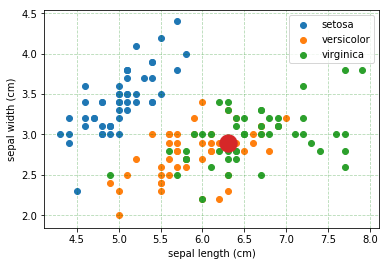

In [102]:
new_data = [6.3, 2.9, 4.9, 1.3]
plot()
plt.scatter([6.3], [2.9],s=300)

Can you devise an algorithm that would allow you to find the distance between our new point and every other point with 1 line of code?

In [109]:
import numpy as np
from collections import Counter
t = df.pop('target')

In [111]:
# Calculate the distance
distance = np.sqrt((df - new_data)**2.)

#Find the 5 closest neigbors (index for the DF)
x = t[(distance).mean(axis=1).argsort()[:5]]

#Iterate through all the neighbors and identify their classification
for item in Counter(x).items():
    print("For class: "+ iris.target_names[item[0]]+", we have: "+str(item[1])+' neighbors')


For class: virginica, we have: 1 neighbors
For class: versicolor, we have: 4 neighbors


What is the above information telling us?  How can we use this to make a prediction?

What would we need to add to scale using the distance of each point?

In [108]:
df['target'] = t
df[df.target == 2].mean()

sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
target               2.000
dtype: float64